<img src="http://www.ulb.ac.be/dre/com/docs/logo3lp.jpg" alt="ULB logo" width="20%" align="right"><br><br><br><br>

# Lecture 2
# The computational framework: Particle Physics and Cosmology 
<p>Université Libre de Bruxelles,

<a href="http://iihe.ac.be/~aguilar">Juan A. Aguilar</a>


</p>

## Preliminaries: What you need to know

In this part we are going to review the concepts that we will use in the rest of the course. It will also serve to set up the conventions, units, etc.

### Natural Units

In high energy physics and astro-particle physics it is very common to use the natural units where $\hbar = c = 1$. The correspondence between natural units and physical units can be established by use of

$$\hbar = 6.58 \times 10^{-16} {\;\rm{GeV}\cdot \rm{ns}} = 1\;\Rightarrow 1\;\rm{GeV} = 1.52 \times 10^{15}\;{\rm{ns}^{-1}}$$

and

$$c = 30.0\;\rm{cm/ns} = 1 \Rightarrow 30\;\rm{cm} = 1\;\rm{ns}$$

In these units there is then only one fundamental dimension:

* Energy and momentum, usually expressed in GeV
* Time and space are GeV$^{-1}$

### Tutorial I: Working with units

Along these notes you are going to find different tutorials in `python` dealing with will help to develope your programin skills in and solve some numerical problems. In this case we are going to see an easy way to work with different units which is uing the module `units` that exist for example in [`astropy`](http://astropy.readthedocs.org/en/latest/units/):

In [1]:
import astropy.units as u
from astropy import constants as const

M_Earth = 5.97E24 * u.kg
M_Sun = 1.99E30 * u.kg
M_MW  = 1E12 * M_Sun
#By adding the quantity u.kg you can print directly the mass in Kg
print ("Mass Earth is: %s" %M_Earth)

Mass Earth is: 5.97e+24 kg


Note that the variables defined above already have their units ``attached`` to them, so when you make a `print` statement it will provide as well the units as a string. That's the reason of the %s format. Another more examples: 

In [2]:
R_Earth = 6.371E6 * u.m # meters
R_Sun = 6.955E8 * u.m # meters
AU = 1.496E11 * u.m # meters

We the radius we can calculate the mean density of Earth and Sun. We will show that units are preserved along calculations:

In [3]:
from numpy import pi
vol_sphere = lambda r: 4*pi/3*r**3
rho_Sun = M_Sun / vol_sphere(R_Sun)
rho_Earth = M_Earth / vol_sphere(R_Earth)

#A unit can be changed calling the .to(u.unit) method
print ("Density of Earth: %s" %(rho_Earth.to(u.g/u.cm**3)))
print ("Density of Sun: %s" %rho_Sun) 

Density of Earth: 5.51141236929 g / cm3
Density of Sun: 1412.12474755 kg / m3


We can use this module to make different transformations of uings, for example from light years to meters:

In [4]:
ly = 1 * u.lyr

print "Number of seconds for light to travel from Sun to Earth:", 1./const.c.to(u.AU/u.s)
print "Meters in a light year:", ly.to(u.m)


Number of seconds for light to travel from Sun to Earth: 499.004783836 s / AU
Meters in a light year: 9.46073047258e+15 m


Assuming that the Galaxy is roughly a disk 50 kpc in diameter and 500 pc thick we can now calculate its density:

In [5]:
V_Gal =  pi * (25000*u.pc)**2 * 500*u.pc

print "Volume of the Milky Way is approximately: %s " % V_Gal.to(u.m**3)
M_Gal = 1E12 * M_Sun
rho_Gal = M_Gal / V_Gal
print "Average density of Milky Way is %s" % rho_Gal.to(u.g/u.cm**3)

Volume of the Milky Way is approximately: 2.88437372034e+61 m3 
Average density of Milky Way is 6.89924466433e-23 g / cm3


### Larmor Radius and Rigidity

Larmor radius, or gyroradius, $r_L$, is the radius of the orbit of a charged particle moving in a uniform, perpendicular magnetic field, obtained by simply equating the Lorentz force with the centripetal force/

It is defined as:
$$q v B = \frac{mv^2}{r_L} \rightarrow r_L = \frac{p}{ZeB}$$

where $p$ has replaced $mv$ in the classical limit.  However, this also holds for the relativistic generalization by considering $p$ to be the relativistic 3-momentum.  There are several adaptations of this formula, tuned to units natural to various scenarios. One such is

$$r_L \simeq  1 \;{\rm kpc} \left(\frac{p}{10^{18}\;\rm{eV}\cdot{c}}\right)\left(\frac{1}{Z}\right)\left(\frac{\mu\rm{ G}}{B}\right)$$

In cosmic ray physics, one often sees references in the literature to the **rigidity** of a particle, defined as:

$$
R \equiv r_L B c = \frac{pc}{Ze}
$$

note that the rigidity, $R$ has units of Volts.



### Superposition model

Another concept that we will use frecuently in cosmic-ray physics is the *superpositoin model*. In the superposition model, a nucleus with mass $A$ and energy $E(A)$ is considered as $A$ independent nucleons with energy $E_0$. In a spallation process the energy per nucleon is approximately cosnserved therefore:


$$A + p \rightarrow A_1 + A_2$$


$$\begin{alignedat}{2}
&E(A) &= &A E_0,\\ 
&E(A_1) &= &A_1 E_0,\\
&E(A_2) &= &A_2 E_0
\end{alignedat}$$


### Cross sections, number density, lifetime, and interaction lengths

The **cross-section** of a reaction is a very important parameter. It can be considered as the effective area for a collision between a target and a projectile. The cross-section of an interaction depends on interaction force, the energy of the particle, etc...

Cross-section is typically measured in surface, cm$^2$ or "barns":

$$ 1 {\rm barn} = 10^{-24} {\rm cm}^2$$

The unit barn comes from the expression "big as a barn" as in the past physisits saw with surprise that interactions were more frequent than expected, and they thought the nucleus was in fact bigger than they thought... big as a barn.

If a flux of *projectile* particles are crossing a volume of *target* particles with cross section $\sigma_N$ then the disapperance of flux  will be proportional to the initial number, the length travelled and number of target particles:

$$ {\rm d} I = -I n \sigma_N {\rm d} x $$

where $n$ is the **number density**, ie, the number of particles per volume unit:

$$ n = \frac{N}{V} $$

note that the number density is related with the mass density as:

$$n = \frac{N_A}{M} \rho_m = \frac{\rho_m}{m_N}$$

where $N_A$ is the avogadro number, $M$ is the total mass of a mol and $m_N$ is the mass of is the mass of a single particles N making up the volume. Solving the equation above we have:

$$I = I_0 e^{-\frac{x}{n\sigma_N}}$$

where we can define:

$$\lambda = \frac{1}{n\sigma_N}$$

as the **interaction length**. Likewise if projectile particles are travelling at speed $v$, the length travelled can be expressed as ${\rm d}x = v {\rm d} t$ giving a similar expression with a time constant:

$$\tau = \frac{1}{n v\sigma_N}$$

Known as the **lifetime**. If several processes are taking place, we need to replace $n\sigma_N$ as $\sum n_i\sigma_i$, which gives:

$$\frac{1}{\tau_{total}} = \frac{1}{\tau_1} + \frac{1}{\tau_2} + ... + \frac{1}{\tau_n}$$


## Coordinates and Time

In this section we are going to review a bit the geography around our Galaxy as well as the different systems in which we can reference to objects in the sky (coordinate systems) or events (time standards).


### Milky Way

The Sun is **7.6-8.7 kpc** from the Galactic Center where there appears to be a supermassive black hole of **1 million solar masses** ($M_{\odot} = 1.99\times 10^{30}$ Kg) which coincides with a radio source known as **Sagittarius A\***.  

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Galactic_centre_orbits.svg" width="40%">
<div class="caption">Source: Wikipedia</div>
</div>

The trayectories of stars around Str A\* can be used to estimate the mass of the black hole. It is the up to now, best prove of the existance of a black hole. Although it is a galaxy with a black hole in their center, the Milky Way is not considered to have an Active Galactic Nuclei due to the low mass of the black hole. 
If we assume the Milky Way to have a cylindrical shape it will have a radius of **30 kpc** and thickness of **300 pc**. Its mass is estimated to be $5.8 \times 10^{11} M_{\odot}$.

### Local Group

The Milky Way is surrounded by 54 known satellite galaxies (most of them dwarf galaxies) in a group known as the **Local Group** (A dwarf galaxy has $\sim$ billion stars compared to our Milky Ways 200-400 billion stars). The most notably are the Large Magellanic Cloud (50 kpc) and the Small Magellanic Cloud (60 kpc). The LMC mass is $10^{10} M_{\odot}$.  Next nearest full-fledged galaxy is Andromeda or M31 ($1.5\times 10^{12} M_{\odot}$) at a distance of approximately **780 kpc**. The group contains also other galaxies MW, M31, M33 (Triangulum Galaxy) and it has volume of diameter of about **3 Mpc**.

<div>
<img src="http://upload.wikimedia.org/wikipedia/commons/5/57/5_Local_Galactic_Group_%28ELitU%29.png", width="40%">
<div class="caption">Source: Wikipedia</div>
</div>

### Virgo Supercluster 

The Local Group is itself contained within the _Virgo Supercluster_ or _Local Supercluster_ (LC) of galaxies extending out to about 33 Mpc.  It has a total mass of $10^{15}M_{\odot}$

### Time scales and time standards

There are several time standards or ways to specify time. A time standard can affect the rate (ie, how long is a day) or reference or point in time, or both. Some standards are:

* [Mean solar time](http://en.wikipedia.org/wiki/Solar_time#Mean_solar_time) There are two solar times, the aparent one (also called true one) which depends on latitude and the year and the Mean solar time which the time of *mean* sun, the difference between the two is called the [equation of time](http://en.wikipedia.org/wiki/Solar_time#mediaviewer/File:Equation_of_time.svg). The length of the mean solar day is slowly increasing due to the tidal acceleration of the Moon by the Earth and the corresponding slowing of Earth's rotation by the Moon.

* [Universal Time (UT0, UT1)](http://en.wikipedia.org/wiki/Universal_Time) Is a time scale based on the mean solar day, defined to be as uniform as possible despite variations in Earth's rotation

* [International Atomic Time](http://en.wikipedia.org/wiki/International_Atomic_Time) Is the primary international time standard from which other time standards, including UTC, are calculated. TAI is kept by the BIPM (International Bureau of Weights and Measures), and is based on the combined input of many atomic clocks around the world.

* [Coordinated Universal Time (UTC)](http://en.wikipedia.org/wiki/Coordinated_Universal_Time) is an atomic time scale designed to approximate Universal Time. UTC differs from TAI by an integral number of seconds. UTC is kept within 0.9 second of UT1 by the introduction of one-second steps to UTC. The difference with UT1 is known as DUT1.

### Time representations: JD and MJD

These are not technically standards (or scales), they are just reprentations (formats) of the aforementioned standards typically used in Astronomy:

* [Julian Date](http://en.wikipedia.org/wiki/Julian_day) Is the count of days elapsed since Greenwich mean noon on 1 January 4713 B.C., Julian proleptic calendar. Note that this day count conforms with the astronomical convention starting the day at noon, in contrast with the civil practice where the day starts with midnight (in popular use the belief is widespread that the day ends with midnight, but this is not the proper scientific use). 

* [Modified Julian Date](http://en.wikipedia.org/wiki/Julian_day) Is defined as MJD = JD - 2400000.5. The half day is subtracted so that the day starts at midnight in conformance with civil time reckoning. There is a good reason for this modification and it has to do with how much precision one can represent in a double (IEEE 754) variable. Julian dates can be expressed in UT, TAI, TDT, etc. and so for precise applications the timescale should be specified, e.g. MJD 49135.3824 TAI.

### Time in experiments

Practically speaking, in experiments time comes from one or more of the following sources:
 

* **Atomic clocks (Cs, Rb)** -They use the microwave signal that electrons in atoms emit when they change energy levels. These have very good short term performance but a Rb clock left by itself will wander by several ns per day.  Cs clocks are perhaps better by a factor of 100x.

 

* **GPS** - The GPS gives precision timing too.  The system consists of the space segment of O(30) satellites each equipped with Caesium atomic clocks and each constantly getting corrections from the central control facility.  GPS broadcasts navigation and time messages synchronized to this ultraprecise time from which the user segment can extract time and space coordinates accurate to O(10) ns and meters, respectively. GPS time is based on the 86400 second day.  It indirectly accounts for leap years. There are _no_ leap seconds in GPS time.

### Tutorial II: Using Time standards in `Astropy`

Time conversions and coordinate conversions are best left to well-tested libraries. SLALIB is a famous set of Fortran libraries that do several transformation. For python I will use `Astropy`. The [Astropy Project](http://www.astropy.org/) is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages. Is included by default in the Anaconda distribution.

In [6]:
from astropy.time import Time
import datetime

In [7]:
i = datetime.datetime.now()

#print i.isocalendar()
print ("Today date and time in ISO format: %s" % i.isoformat() )

Today date and time in ISO format: 2018-03-14T10:42:09.462614


In [8]:
times = ['1999-01-01T00:00:00.123456789', i.isoformat()]

#print type(times[0])
t = Time(times, format='isot', scale='utc')

print "Todays julian date (UTC) is %f" %(t[1].jd)
print "Today's modified julian date (UTC) is %.2f"  %t[1].mjd

Todays julian date (UTC) is 2458191.945943
Today's modified julian date (UTC) is 58191.45


In [9]:
dt = t[1] - t[0]

print "The time difference in mjd is %.2f " %dt.value
print "The time difference in seconds is %.2f" %dt.sec

The time difference in mjd is 7012.45 
The time difference in seconds is 605875334.34


### Coordinate System:

Coordinate systems are used to map objects position in the sky. They can divided into local coordiantes and celestial coordinate systems:

#### Local coordinates 

These are those that depend on from where on Earth you observe, ie they have the observer's local position as reference. For example the horizontal coordinate system is expressed in terms of **altitude** (or elevation or zenith) angle and **azimuth**. These coordinates are not useful to inequivocally identify the position of an object in the sky since celestials object local coordinates change with time.

#### Celestial coordinate systems

Those systems are independent of the observer's local position. Two of the mostly used coordinates systems in astroparticle are:

* **Equatorial coordinates**: It's defined by an origin at the center of the Earth, a fundamental plane consisting of the projection of the Earth's equator onto the celestial sphere. Coordinates are give by **right ascension** and **declination**.

<div>
  <img src="images/eq_coordinates.svg?sanitize=True" width="40%">
</div>

   


* **Galactic coordinates**: The **galactic longitude**, $\ell$ is the angular distance Eastward (counterclockwise looking down on the Galaxy from the GNP) from the Galactic Center and the **galactic latitude**, $b$, is the angular distance outside of the plane of the Galaxy, positive up, negative down.  Note that having a large galactic latitude is neither a necessary nor a sufficient condition for an object being extragalactic.  This is how to get the image of the Galactic plane on the celestial sphere.

### Tutorial II: Coordinate transformations

Let's do some "representation" of the galactic plane.  We generate some random points using numpy following a 2-dimensional gaussian in the $\ell$: $-\pi, +\pi$ and $b$:$-\pi/2, +\pi/2$ space. Now we are going to use `matplotlib` to make plots, for that we are going to call the magic command `%matplotlib inline` to make the plots appear inside the notebook:

In [10]:
%matplotlib inline

#We call random.multivariate_normal to generate randon normal points at 0 
import numpy as np

#import matplotlib for plots
import matplotlib.pylab as plt
#Lets use the inline figure format as svg
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-poster")

In [11]:
disk = np.random.multivariate_normal(mean=[0,0], cov=np.diag([1,0.001]), size=5000)
#disk is a list of pairs [l, b] in radians
print disk

[[-0.67468411  0.02506884]
 [ 0.51426027  0.01857212]
 [ 0.04524707  0.00521082]
 ..., 
 [-0.90347108  0.03407261]
 [ 0.54118508  0.05098248]
 [ 0.12404591  0.03316766]]


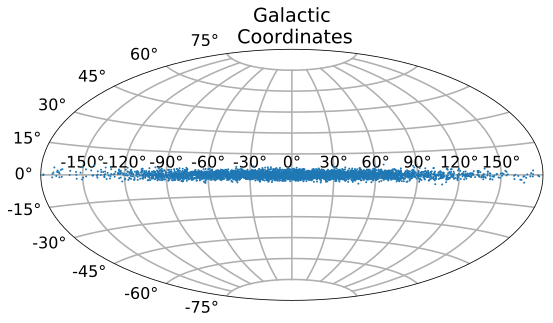

In [12]:
f = plt.figure(figsize=(9,7))
ax = plt.subplot(111, projection='aitoff')
#There are several projections: Aitoff, Hammer, Lambert, MollWeide
ax.set_title("Galactic\n Coordinates")
ax.grid(True)
ll = disk[:,0]
bb = disk[:,1]
#ax.set_axis_bgcolor("black")
#ax.tick_params(axis='x', colors='white')
ax.plot(ll, bb, 'o', markersize=2, alpha=0.3)
plt.show()


Now let's plot it in equatorial coordinates (right ascension, declination).


In [13]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c_gal = SkyCoord(l=ll*u.radian, b=bb*u.radian, frame='galactic')
c_gal_icrs = c_gal.icrs


Because ```matplotlib``` needs the coordinates in radians and between −π and π, not 0 and 2π, we have to convert them. 

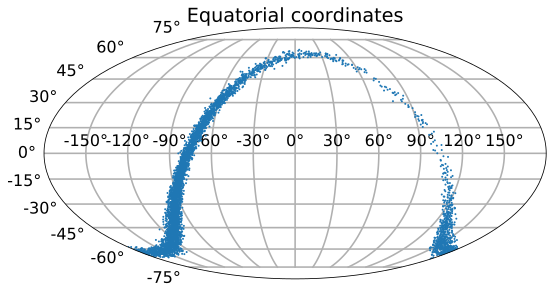

In [14]:
ra_rad = c_gal_icrs.ra.wrap_at(180 * u.deg).radian
dec_rad = c_gal_icrs.dec.radian 

plt.figure(figsize=(9,7))
ax = plt.subplot(111, projection="mollweide")
ax.set_title("Equatorial coordinates")
plt.grid(True)
ax.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
plt.show()
#NOTE: Normally right ascension is plotted from right (0 deg.) to left (360 deg.)

## Special Relativity

### Introduction

Why is it important? 

$$\gamma = \sqrt{\frac{1}{1-\beta^2}}\;, \beta = \frac{v}{c}$$

* Jets emitted by supermassive black holes have:
$\gamma \approx 30 \rightarrow \beta = 0.9984$
* Electrons spiraling in B-field lines of pulsars have:
$\gamma \sim 10^7$
* Lorentz factors of protons of $10^{20}$ eV:
$\gamma = \frac{E}{m^0_p c^2} = \frac{10^{20}}{1\times 10^9} = 10^{11}$

Two principles:

1. *The Principle of Relativity* – The laws by which the states of physical systems undergo change are not affected, whether these changes of state be referred to the one or the other of two systems in uniform translatory motion relative to each other

2. *The Principle of Invariant Light Speed*– "... light is always propagated in empty space with a definite velocity [speed] c which is independent of the state of motion of the emitting body."

### Lorentz Transformations

As a simple case, consider a reference frame *O* and and observer in another
frame *O'* moving at constant speed $\beta$ along the $x$ axis:

<div>
<img src="http://upload.wikimedia.org/wikipedia/commons/6/64/Frames_of_reference_in_relative_motion.svg" width="40%">
<div class="caption">Source: Wikipedia</div></div>

A Lorentz transformation or *boost* is the transformation from one inertial
reference frame to another.  In general it is a $(4\times4)$ matrix which 
encapsulates the system of equations describing the transformation (in natural units).

$$\begin{aligned}
t' &= \gamma(t - \beta x) \\
x' &= \gamma(x - \beta t) \\
y' &= y \\
z' &= z
\end{aligned}$$


The matrix form of this transformation is

$$x'^\mu = {\Lambda^\mu}_\nu x^\nu, \; {\Lambda^\mu}_\nu = 
\begin{pmatrix}
\gamma & -\beta\gamma & 0 & 0 \\
-\beta\gamma & \gamma & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{pmatrix}$$

This is just a particular case of a Lorentz transformation (there is nothing special on the x-axis) and a variable invariant under a Lorentz transformation is called *Lorentz invariant or scalar*.

The line element $\Delta s^2$ is a Lorentz invariant:

$$\Delta s^2 = \Delta t^2 - \Delta x^2 - \Delta y^2 -\Delta z^2 $$

This can be rewritten as the inner product of a 4-vector $x^{\mu}$:

$$\Delta s^2 = x^2 \equiv x^\mu x_\mu = g_{\mu\nu} x^\mu x^\nu$$

where *metric tensor* $g_{\mu\nu}$ is:

$$g_{00} = + 1, g_{11} = g_{22} = g_{33} = - 1 , g_{\mu\nu} = 0, \;\rm{for}\; \mu \neq\nu$$

is called the **Minkowski space**


### Consequences of Lorentz transformations

Lorentz transformation have the following (some of them really bizarre) consequences:

* **Relativity of simultaneity.** $\Delta t' = 0$ in $O'$ doesn't imply $\Delta t = 0$ in $O$:

$$\Delta t' = \gamma(\Delta t - \beta \Delta x)$$

  

* **Time dilatation.** If $\Delta x = 0$ i.e. the ticks of one clock:

$$\Delta t' = \gamma \Delta t$$

* **Length contraction.** For events satisfying $\Delta t' = 0$:

    $$\Delta x' = \frac{\Delta x}{\gamma}$$

* **Equivalence of mass and energy.**


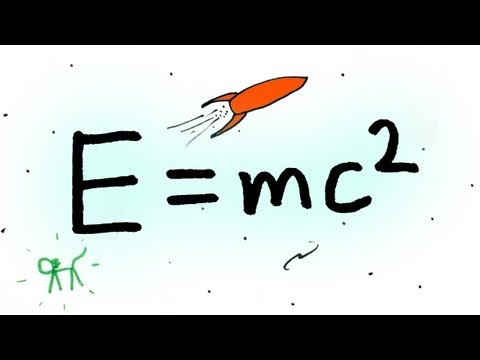

In [15]:
from IPython.display import YouTubeVideo
# Video credit: Minute Physics
YouTubeVideo('hW7DW9NIO9M')


## Relativistic kinematics
### Four-vectors

We saw that position vectors in Minkowski space become 4-vectors with zeroth component. $x^0 = t$, identified with time. Likewise momentum 4-vector has $p^0 = E$:

$$ {\bf P} = (E, \vec{p})$$

$$ {\bf X} = (t, \vec{x})$$

We saw that the inner product in Minkowski space is invariant under Lorentz transformations. In this case, the Lorentz invariant is:

$$  s = p_\mu p^{\mu} = m_0^2 = E^2 -{\vec p\cdot \vec p} \rightarrow E^2 = {\vec p\cdot \vec p} +m_0^2$$ 

which is the *relativistic energy-momentum relationship*. 

$$ E = m = \gamma m_0$$

One can derive the expresions for relativistic 3-momentum and kinetic energy:

$$|{\vec p}|= \beta E$$

$$E_{kin} \equiv E - m_0 = (\gamma -1) m_0$$



### Transformation to the Center-of-Momentum Frame (COM)

As a concrete example of how 4-vectors aid real calculations, let's take the classic 
case of a transformation to the center-of-momentum frame (COM), that is, a coordinate frame where the total three-momentum $\vec p = 0$. 
In this case the invariant square of a system is equal to the total COM energy square or:

$$\sqrt{s} = E_{COM}$$

In the case of a two-particle system with particles A and B with energies $(E_A)$ and $(E_B)$, and 3-momenta $(\vec{p}_A)$ and $(\vec{p}_B)$:

$$\begin{aligned}
s = p^2 &= (E_A + E_B)^2 - (\vec{p}_A + \vec{p}_B)^2 \\
    &= m_A^2 + m_B^2 + 2E_AE_B - 2(\vec{p}_A \cdot \vec{p}_B)\\
    &= m_A^2 + m_B^2 + 2E_AE_B( 1 - \beta_A\beta_B\cos \theta)\\
    &= E_{COM}^2 
\end{aligned}$$

where we used the fact that:
$$\vec{p}_A \cdot \vec{p}_B = |\vec{p}_A ||\vec{p}_B|\cos\theta$$

and

$$ |\vec{p}| = E\beta $$

The energy available for new particle creation is $\epsilon = E_{COM} - m_B - m_A$. If $E_A \gg m_A$ and $E_B \gg m_B$ then

   $$\epsilon^2 \approx 2 (E_A E_B - \vec{p}_A \vec{p}_B )$$




### Fixed-target experiment

If the target particle B is at rest in the laboratory system (as is the case in accelerator fixed-target experiments or UHE cosmic rays striking nucleons in the atmosphere, or ...) then $(E_B = m_B)$ and $(\vec{p}_B = 0)$. In this case, 

$$\begin{align}
E_{COM}^2 = m_A^2 + m_B^2 + 2E_Am_B
\end{align}$$

which in the ultra-relativistic limit where energies are much higher than the masses $(E \gg m)$ simplifies to

$$\epsilon = E_{COM} \simeq \sqrt{2m_BE_A}$$

Equivalently, the threshold energy of the beam particle A needed to produce a particle of mass $(m_*)$ at rest in the boosted frame is:

$$E_{A,\mathrm{thresh}} = \frac{m_*^2}{2m_B}$$



<div class="question"> <b>Example 1:</b> $\pi^0$ production. Considering the photoproduction of pion on a target proton at rest mass:
$$\gamma + p \rightarrow p + \pi^0$$
</div>

$$\begin{align} 
\sqrt{s} = \sqrt{m_p^2 + 2E_\gamma m_p} &\geq m_p + m_{\pi^0}\\
m_p^2 + 2 E_\gamma m_p &\geq m_p^2 + m^2_{\pi^0} + 2 m_p^2 m^2_{\pi^0}
\end{align}
$$
$$E_\gamma \geq m_{\pi^0} + \frac{m^2_{\pi^0}}{2 m_p} \approx 145 {\rm \; MeV}$$

### Collider experiment

In the case of a collider experiment where beam particles A and B are counter-circulating in an accelerator and collide head-on, then 

$${\vec p}_{A}\cdot{\vec p}_{B} = -|{\vec p}_{A}||{\vec p}_{B}|$$

and the equation of the 3-momenta ${\vec p}_A$ becomes

$$\begin{align}
s = E_{COM}^2 = m_A^2 + m_B^2 + 2(E_AE_B + |{\vec p}_{A}||{\vec p}_{B}|) \rightarrow \epsilon^2 \simeq 4E_AE_B
\end{align}$$

in the relativistic limit where mass can be ignored.  This in turn has the consequence that in a collider experiment the energy available in the COM to produce new particles rises linearly with beam energy when $E_A = E_B$.

Nevertheless, it is still the case that the COM energies probed by astroparticles exceeds the LHC's reach by a factor of 10! 

<div class="question"> <b>Example 2:</b> Consider an UHECR proton at $E_p = 10^{10}\;\rm{GeV}$ interacting with a proton ($m_p = 1 \rm{GeV}$) at rest in the atmosphere, what is the energy in the COM frame?
</div>


$$E_{COM} = \sqrt{2 m_p^2 + 2 E_p m_p} \simeq 142\;\; {\rm TeV} $$


### Two-body decay in COM

The COM is also useful to estimate the energy of two particles from the decay of a particle with mass $M$.  If a particle A decays into  $m_1$ and $m_2$, we have that in the COM the particle A has ${\vec p_A} = {\vec p_{COM}} = 0$. Then the invariant is given by:

$$ s = M^2 = (E_1 + E_2)^2 -  (\vec{p}_1 + \vec{p}_2)^2 $$

where ${\vec p_1} = -{\vec p_2}$. The energies in the COM are given by:

$$ M^2 = (E_1 + E_2)^2 \rightarrow M = E_1 + E_2 $$

$$E_1^2 = p_1^2 + m_1^2\;\;\;{\rm and}\;\; E_2^2 = p_2^2 + m_2^2$$

since $|{\vec p_1}| = |{\vec p_2}|$ we can make the substraction:

$$E_1^2 - E_2^2 = m_1^2 - m_2^2 \rightarrow E_2^2 = E_1^2 - m_1^2 + m_2^2$$

sustituing $E_2^2$ in $M^2 = E_1^2 + E_2^2 + 2E_1 E_2$ and using $E_2 = M - E_1$ we have:


$$M^2 = E_1^2 + E_1^2 - m_1^2 + m_2^2 + 2E_1(M- E_1) = 2E_1^2 - m_1^2 + m_2^2 - 2E_1^2 + 2E_1M$$


$$E_1 = \frac{1}{2M}(M^2 + m_1^2 - m_2^2)$$

likewise we can prove:

$$E_2 = \frac{1}{2M}(M^2 + m_2^2 - m_1^2)$$

and the momentum:

$${|\vec p_1|^2} = E_1^2 - m_1^2 = \frac{1}{4M^2}(M^4 - 2M^2(m_1^2 + m_2^2) + (m_1^2 + m_2^2)^2) = {|\vec p_2|^2}$$

Energies and momentums are fixed, the only unknowns are the angles. 

## Cosmology

### Red-shift

Red-shift is the shift (towards red) in the electromagnetic spectrum and is defined as:


$$z=\frac{\lambda_{obs} - \lambda_{emit}}{\lambda_{emit}}$$ 


If a source of the light is moving away from an observer, then redshift (z > 0) occurs; if the source moves towards the observer, then blueshift (z < 0) occurs. This is true for all electromagnetic waves and is explained by the Doppler effect. Consequently, this type of redshift is called the *Doppler redshift*.

### Relativistic Redshift

<div>

<img src="images/doppler0.png">
</div>

The wavefront moves with velocity $c$, but at the same time the source moves away with velocity $v$. Afte a time $t_s$ the source has receded $vt$. The crest of the wave emission is at $\lambda+v t_s=ct_s$. The period in the reference system of the source is given by:

$$t_s = \frac{\lambda}{c-v} = \frac{c}{(c-v)f_s} = \frac{1}{(1-\beta)f_s},$$

Remember that when a reference $O_s$ was moving at speed $\beta$ from a another reference $O_{o}$, the time relation was:

$$\Delta t_s = \gamma(\Delta t_{o} - \beta \Delta x_{o})$$

Since $\Delta x_{o} =0$ (we are just measuring when the crest of the waves arrive), then the time observed $t_{o}$ in the reference system O is given:

$$t_o = \frac{t_s}{\gamma},$$

The corresponding observed frequency is
$$f_o = \frac{1}{t_o} = \gamma (1-\beta) f_s = \sqrt{\frac{1-\beta}{1+\beta}}\,f_s$$

The ratio

$$\frac{f_s}{f_o} = \sqrt{\frac{1+\beta}{1-\beta}}$$

is called the *Doppler factor* of the source relative to the observer. 

The corresponding wavelengths are related by

$$\frac{\lambda_o}{\lambda_s} = \frac{f_s}{f_o} = \sqrt{\frac{1+\beta}{1-\beta}}$$

and the resulting redshift

$$z = \frac{\lambda_o - \lambda_s}{\lambda_s} = \frac{f_s - f_o}{f_o}$$

can be written as

$$z = \sqrt{\frac{1+\beta}{1-\beta}} - 1.$$

In the non-relativistic limit (when $v \ll c$) this redshift can be approximated by $z \simeq \beta = \frac{v}{c}$ corresponding to the classical Doppler effect.

When interpreted as a relativistic Doppler shift from object receeding at velocity $\beta$, this is: 

$$\lambda_o = \sqrt{\frac{1+\beta}{1-\beta}}\lambda_s \simeq (1+\beta)\lambda_s$$

for near, only mildly relativistic $v \ll c$, objects so that the **redshift $z$ is approximately equal to the velocity**.

### Hubble expansion 

When ploting their redshift (ie speed) as function of distance (measured with the techniques we saw, parallax, etc.) in 1929 Hubble found a correlation between redshift and radial distance from Earth:

<div>
<img src="http://adansonia.as.arizona.edu/~edo/astr170B1_spring2014/lectures/Apr30/20_21_Figure-Anno.jpg" width="50%">
<div class="caption">Source: Adansonia.as.arizona.edu</div>
</div>

$$v = H_0 r, \; H_0 = 72\;\rm{km/s/Mpc}$$


Note that $H_0$ has only units of time$^{-1}$ we explicitely write the other dimensions to better understand its meaning.

But Doppler redshift does not depends on distance! So this not a doppler redshift but a **Cosmological redshift**. In this case the redshift is not due to relative velocities, the photons instead increase in wavelength and redshift because the spacetime through which they are traveling is expanding. 


But we said that for midly relativistic objects (and galaxies are moving at midly relativistic speeds) we can approximate $z \approx \beta$ so we *can use $z$ to estimate distances!*:

$$r \simeq \frac{c}{H_0}z \simeq 4000\;\rm{Mpc}\cdot z$$

However is bit tricky, is it the distance when light was emitted or when ligth arrived?

#### Age of the Universe (first approximation)

If we assume that the rate of expansion (ie H) is essentially constant (it is not!) the age of the Universe can be estimated by this relation:

$$\frac{d r}{dt} = H_0 r \rightarrow \int \frac{1}{r}dr =\int H_0 dt$$

$$ {\rm In} r = H_0 t \rightarrow r = e^{H_0 t}$$

where Universe increases by a factor $e$ every $t_{\mathrm{Hubble}} = \frac{1}{H_0} = 14\times 10^9\rm{yr}$ which is the **Hubble time**.

#### No center of the Universe

Despite seing all galaxies receding, we are not at the center of the Universe. The common interpretation of the expansion is that we are living in a Universe that can be thought of lying on the surface of a balloon.  Distances between objects (points on the ballon) on this manifold are expressed as:

$$r(t) = R(t)r_0$$

where $R(t)$ is a scale factor, depending on the time, and $r_0$ is a *comoving coordinate* without time dependence or current distance if we assume $R(0) = 1$, but sometimes its better to explicitelly use a *normalized* scale factor as $a(t) = R(t)/R(0)$ 

#### Are we expaning?

> [Brooklyn is not expanding!](https://www.youtube.com/watch?v=5U1-OmAICpU)          *Annie Hall* 



## Cosmological principle

The *cosmological principle* is the notion that the distribution of matter in the Universe is **homogeneous** and **isotropic** when viewed on a large enough scale.

* **Homogeneity** states that the distribution of matter is even in each epoch.
* **Isotropy** states that there are no prefered directions in the distribution of matter in space.

<div>

<img src="http://www.roe.ac.uk/~jap/2df/2df_slice_blue_big.gif" width="60%">

</div>

The [End of Greatness](http://en.wikipedia.org/wiki/Observable_universe#End_of_Greatness) is an observational scale discovered at roughly 100 Mpc where the lumpiness seen in the large-scale structure of the universe is homogenized and isotropized, this together with the isotropy of the CMB reinforced the idea of the **Cosmological Principle**.

However, in 2013 a new structure **3 Gpc** wide has been discovered, the [Hercules–Corona Borealis Great Wall](http://arxiv.org/abs/1311.1104), which puts doubt on the validity of the cosmological principle...

### Friedmann–Lemaître-Robertson-Walker

So we are looking for a Universe that is isotropic, homogeneous and it is expanding. The metric that describes such a Universe is given by the **Friedmann–Lemaître-Robertson-Walker** metric:

$$ds^2 = dt^2 - R(t)^2 d \Sigma(k)^2 = dt^2 - a^2(t)R^2_0\left[\frac{dr^2}{1 - kr^2} + r^2(d\theta^2  + sin^2\theta d\phi^2)\right]$$

where $d\Sigma(k)$ refers to the spatial 3-dimentional metric depending on the curvature parameter $k$ which takes the values +1, 0, -1, and we used the normalized form of the scale factor $a(t) = R(t)/R_0$. 

<div>

<img src="http://quantum-bits.org/wp-content/uploads/2015/08/universe-shape-1024x950.jpg", width="40%">
<div class="caption">Source: quantum-bits.org </div>
</div>

The evolution of the scale parameter as in the case of wavelength (see Exercises):

$$a(t) = \frac{1}{1+z}$$

### Friedman equations

The dynamics of the FLRW metric is governed by the Einstein's equations. Einstein's original field equations are:

$$R_{\mu\nu} - \frac{1}{2}Rg_{\mu\nu} = 8 \pi GT_{\mu\nu}$$

In Newtonian gravity, the source is mass. In special relativity, is a more general concept called the energy-momemtum tensor, which may be modeled as a perfect fluid:

$$T_{\mu\nu} = (\rho + p)U_\mu U_\nu + pg_{\mu\nu}$$

were $U_\mu$ is the fluid four-velocity amd $\rho$ is an energy density. The FLRW metric solution to the Einstein equations can be reduced to the two **Friedmann equations**:

$$H^2 \equiv \left(\frac{\dot a}{a}\right)^{2} =  \frac{8\pi G}{3}\rho - \frac{kc^{2}}{a^2R^2_0} $$

and

$$\frac{\ddot a}{a} = -\frac{4\pi G}{3}(\rho + 3p)$$

### Cosmological Constants

Given the Friedmann equations we can calculate for any value of $H$ the critical density such as the geometry is flat ($k=0$):

$$\rho_{crit} = \frac{3H^2}{8\pi G}$$

It is convenient to measure the the total energy density in terms of critical density by introducing the density parameters:

$$\Omega\equiv\frac{\rho}{\rho_{crit}} = \left(\frac{8\pi G}{3H^2}\right)\rho$$

In general the energy density will have contributions of distinct components so whe can defined:


$$\Omega_i\equiv\frac{\rho_i}{\rho_{crit}} = \left(\frac{8\pi G}{3H^2}\right)\rho_i$$

where $i$ stands for the different components of the energy density as we will see later: matter (or dust), radiation, cosmological density, curvature density.

For the special case of $a(t_0) = 1$, ie, today, we have the formula:

$$H_0^2\Omega_0 = \frac{8\pi G}{3}\rho_0$$



### The cosmological constant

Einstein was interested in finding $\dot{a} = 0$ (ie static) solutions. This can be achieved if $k= + 1$ and $\rho$ is appropriately tuned. But $\ddot a$ will not vanish in this case. Einstein therefore modified his equations to:

$$R_{\mu\nu} - \frac{1}{2}Rg_{\mu\nu} + \Lambda g_{\mu\nu}= 8 \pi GT_{\mu\nu}$$

and with this modification the Friedmann equations are:


$$
\begin{aligned}
H^2  &=  \left(\frac{\dot a}{a} \right)^2 = \frac{8\pi G}{3}\rho + \frac{\Lambda}{3} - \frac{kc^{2}}{a^2R^2_0} \\
\frac{\ddot a}{a} &= -\frac{4\pi G}{3}(\rho + 3p) +  \frac{\Lambda}{3}
\end{aligned}
$$

The discovery by Hubble that the Universe is expanding eliminated the empirical need for a static world. However, we believe that $\Lambda$ is actually nonzero, so Einstein was right after all. 
Assuming that cosmological constant is due to the vacuum energy, most quantum field theories predict a $\Lambda$ that is  120 orders of magnitude larger than the observational values! this is so-called **cosmological constant problem**.

### Evolution of the Cosmological Constants

In general the energy density will have contributions of distinct components which will evolve differently with the Universe expansion:
* Massive particles with negligible velocities are known in cosmology as *dust* or simply *matter*. Their density scales as the number density times their rest mass. Their number density scales as the inverse of the volume while the rest mass is constant: $\rho_M \propto a^{-3}$
* Relativistic particles are known as *radiation* (although it is not only photons) and their energy density is the number density times the particle energy, the latter is proportional to $a^{-1}$ (as they redshift with expansion) and so: $\rho_r \propto a^{-4}$
* Vacuum energy does not change as universe expand so we can define a $\rho_\Lambda \equiv \frac{\Lambda}{8\pi G} \propto a^0$
* It is useful to pretend that $-ka^{-2}R_0^{-2}$ represents an effective *curvature energy density* defining $\rho_k \equiv -(3k/8\pi G R^2_0)a^{-2}$.

Given this evolution it is possible to write:

$$ H^2(t) = H^2_0 [\Omega^0_M(1+z)^3 + \Omega^0_r(1+z)^4 + \Omega^0_k(1+z)^2 +\Omega^0_\Lambda]$$

### Observational results

* There are good reasons to believe that the energy density of radiation is much less than matter, as photon contrinute only to $\Omega_r \sim 5 \times 10^{-5}$ mostly in the CMB. Therefore is useful to parametrize the universe today as $\Omega_k = 1 - \Omega_M - \Omega_\Lambda$.

* **Direct measures of the Hubble constant.**. The most reliable result on the Hubble constant comes from the [Hubble Space Telecope Key Project](http://iopscience.iop.org/0004-637X/553/1/47). They use the Cepheids to obtain distances to 31 galaxies (They also use Type Ia Supernovae). A recent study with over 600 Cepheids yielded the number $H_0 = 73.8 \pm 2.4 {\rm\;km\;s^{-1}\; Mpc^{-1}}$. The indirect measurement from *Planck* Collaboration gives somehow a lower value (this discrepancy as well as the comic distance-ladder method are under investigation).

* **Supernovae.** Two major studies, the Supernova Cosmology Project and the High-$z$ Supernova Search Team, found evidence for an accelerating Universe. When combined with the CMB data indicating flatness (ie $\Omega_k = 0 \rightarrow \Omega_M + \Omega_\Lambda = 1$), the best-fit values were $\Omega_M \approx 0.3$ and $\Omega_\Lambda \approx 0.7$)


* **Cosmic Microwave Background.** See next section.



### Cosmic Microwave Background

The cosmic microwave background (CMB) is electromagnetic radiation that remains from the time when photons decoupled from matter shortly after the recombination of electrons and protons into neutral hydrogen atoms. Once photons decoupled from matter, they traveled freely through the universe without interacting with matter. For an observer today this CMB is observed as a distribution of temperatures (from black body radiation) at on a two-dimensional sphere. This temperature distribution, however, was shown to have anisotropies. If we denote $\Delta T (\theta, \phi)$  the temperature difference measured in the direction ($\sin\theta \cos \theta, \sin\theta \sin\theta , \cos\theta$) with respect to $T_0 =$ 2.725 K, the average temperature we can decompose these anisotropies over the bases of spherical harmonics, the so called $Y_{\ell m} (\theta, \phi)$, the same way a we can decompose a function in a curved space over sines and cosines by the Fourier transform:

$$\frac{\Delta T}{T} = \sum_{\ell m} a_{\ell m} Y_{\ell m} (\theta, \phi)$$

This decomposition tell us the amount of anisotropy at a given the multipole moment $\ell$ or angular scale $\theta = \frac{180^{\circ}}{\ell}$


$$C_\ell = \langle |a_{\ell m}|^2 \rangle$$



<div>

<img src="http://sci.esa.int/science-e-media/img/63/Planck_power_spectrum_orig.jpg" width="80%"> 
<div class="caption">Source: ESA </div>
</div>

The power spectrum of the CMB represents the anisotropies of the CMB as a function of the angular scale. The typical spectrum features a plateu at large angular scales (small $\ell$) followed by some oscillatory features (aka acoustic peaks or *Doppler peak*). These peaks represent the oscillation of photon-baryon fuild around the decoupling. The first peak at $\ell \sim 200$ probes the spatial geometry, while the relative heights probe the baryon density. The position of the first peak constrains the spatial geometry in a way consistent with a flat Universe ($\Omega_k \sim 0$)  

**Build your own Universe [here](https://lambda.gsfc.nasa.gov/education/cmb_plotter/)**

### Before Planck

<div>

<img src="images/eso0419d.jpg" width="40%" align="center"/>

</div>

### After Planck

Planck showed that the amount of dark energy in the Universe is appreciably less than we had previously thought, while the amount of dark-and-normal matter is appreciably greater than we thought.

<div>

<img src="images/Lambda_Matter.jpg" width="100%" align="center"/>

</div>



### Age of Universe



We have shown the evolution of the Hubble expansion as a function of the redshift using the clousure parameters. We know that

$$H(z) = \frac{\dot a}{a} = -\left(\frac{{\rm d}z/{\rm d}t}{(1+z)}\right) \rightarrow {\rm d}t = -\frac{{\rm d}z}{(1+z)H(z)}$$

And so the age of the universe can be calculated as (where $z=0$ corresponds to today $t_0$):


$$\int_{0}^{t_0} {\rm d} t = t_0 = \frac{1}{H_0} \int^\infty_0 \frac{{\rm d}z}{\Omega_M(1+z)^4 + \Omega_r(1+z)^5 + \Omega_k(1+z)^3 +\Omega_\Lambda(1+z)]} $$

Assuming a flat Universe $\Omega_k =0$ and ignoring the radiation $\Omega_r \ll \Omega_M$ the integral gets simplified to:

$$H_0 t_0 = \frac{1}{3\sqrt{1 - \Omega_M}}{\rm In}\left(\frac{1+\sqrt{1 - \Omega_M}}{1 - \sqrt{1- \Omega_M}}\right)$$
where we used $1 = \Omega_\Lambda + \Omega_M$

For $\Omega_M = 0.70$ and $\Omega_\Lambda = (1 - \Omega_M) = 0.30$ one finds $H_0 t_0 = 0.964$ so that $t_0 \approx \frac{0.96}{H_0} = 13.5$ Gyr. Larger than the assumption we did with a constant $H_0$. 

### Tutorial III: Age of the Universe

Another way to rewrite the loopback formula is in terms of the scale factor $a$:


$$ {\rm d}t = \frac{{\rm d}a}{H(a)a} $$

with 

$$  H^2(a) = H^2_0 [\Omega^0_M a^{-3} + \Omega^0_r a^{-4} + \Omega^0_k a^{-2} +\Omega^0_\Lambda] $$

We need to numerically integrate the right hand side of the equation. However, for some parameters this integration is circular, reaching a $a_{max}$ then the $H^2(a_{max}) = 0$

In [16]:
#We take the current value of H0 from the astropy package

from astropy.cosmology import Planck13
H0 = Planck13.H(0).value

#We define the friedman equation ignoring the radiation component omega_r <<
def friedman(a, omega_M, omega_lambda):
    omega_k = 1 - omega_M - omega_lambda
    H2 = H0**2 * (omega_M * a**-3 + omega_k * a**-2 + omega_lambda)
    return H2


In [17]:
import scipy.integrate as integrate

#This is a simple integration, it does not take into account a possible Big Crunch
"""
def calculate_times(omega_m, omega_lambda):
    t0 = integrate.quad(lambda x: 1/x * 1/np.sqrt(friedman(x,omega_m, omega_lambda)), 0, 1)[0]
    times = []
    scales = np.arange(0.1, 2, 0.01)
    for a in scales:
        time = integrate.quad(lambda x: 1/x * 1/np.sqrt(friedman(x,omega_m, omega_lambda)), 0, a)[0]
        times.append(H0*(time - t0))  
    
    return np.array(times), np.array(scales)
"""

#This integration takes into account a Big Crunch
def calculate_times(omega_m, omega_lambda):
    #Lets check if there is a maximal, ie, if H^2(a) = 0
    astep = 0.001
    scales = np.arange(0.1, 3, astep)
    amax = 1e9
    for a in scales:
        if( friedman(a, omega_M, omega_lambda) < 0):
            amax = a
            scales = np.arange(0.1, 2*amax, 0.01) #we go from a = 0 to a= 2*amax
            print ("Found a-max in %.2f" %amax)
            break
    
    #time at a = a_max
    tmax = integrate.quad(lambda x: 1/x * 1/np.sqrt(friedman(x,omega_m, omega_lambda)), 0, amax - astep)[0]
    #time today a = 1
    t0 = integrate.quad(lambda x: 1/x * 1/np.sqrt(friedman(x,omega_m, omega_lambda)), 0, 1)[0]
    
    #Empty x,y for the plots
    times = []
    scale = []
    for a in scales:
        if a < amax: #If a < amax we do the typical integral 0 -> a 
            time = integrate.quad(lambda x: 1/x * 1/np.sqrt(friedman(x,omega_m, omega_lambda)), 0, a)[0]
            times.append(H0*(time - t0)) #We calibrate at -t0 to place all curves together
            scfrom IPython.core.display import HTML
        if a >= amax: #If a > amax we are out the domain we integrate backwards
            time = 2*tmax - integrate.quad(lambda x: 1/x * 1/np.sqrt(friedman(x,omega_m, omega_lambda)), 0, 2*amax -a)[0]
            times.append(H0*(time - t0))
            scale.append(2*amax - a)
    return np.array(times), np.array(scale)
        


Found a-max in 1.33


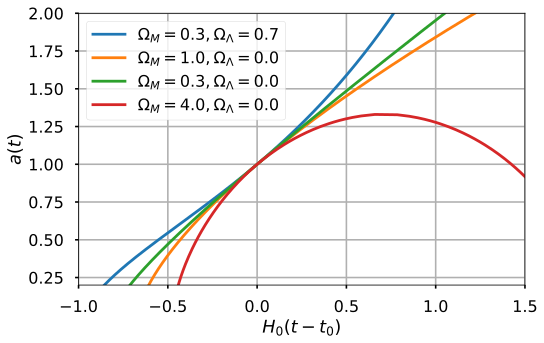

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

omega_M = 0.3
omega_lambda = 0.7
x, y = calculate_times(omega_M, omega_lambda)
ax.plot(x, y, label="$\Omega_M = %.1f, \Omega_\Lambda = %.1f$" %(omega_M, omega_lambda))

omega_M = 1.0
omega_lambda = 0
x, y = calculate_times(omega_M, omega_lambda)
ax.plot(x, y, label="$\Omega_M = %.1f, \Omega_\Lambda = %.1f$" %(omega_M, omega_lambda))

omega_M = 0.3
omega_lambda = 0
x, y = calculate_times(omega_M, omega_lambda)
ax.plot(x, y, label="$\Omega_M = %.1f, \Omega_\Lambda = %.1f$" %(omega_M, omega_lambda))

omega_M = 4
omega_lambda = 0
x, y = calculate_times(omega_M, omega_lambda)
ax.plot(x, y, label="$\Omega_M = %.1f, \Omega_\Lambda = %.1f$" %(omega_M, omega_lambda))


plt.legend(loc="upper left")
ax.grid()
ax.set_xlim(-1,1.5)
ax.set_ylim(0.2,2)
ax.set_ylabel("$a(t)$")
ax.set_xlabel("$H_0 (t - t_0)$")
plt.show()

#### References

* **AstroParticle Physics**, Claus Grupen. ISBN 3- 540-25312-2
* **The Cosmological Constant**, Sean Carrol. [astro-ph/0004075](https://arxiv.org/abs/astro-ph/0004075) (2001). A bit old, but still a good review.


In [19]:
%load_ext version_information
%version_information numpy, matplotlib, astropy, scipy

Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.49)]
IPython 5.4.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.12.0
matplotlib 2.0.0
astropy 1.3
scipy 0.18.1
Wed Mar 14 10:42:22 2018 CET

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("css/custom.css", "r").read()
    return HTML(styles)
css_styling()